<a href="https://colab.research.google.com/github/mygithub011/ML-Projects-Using-CNN/blob/master/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Breast Cancer Detection Using CNN

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 49kB/s 
     |████████████████████████████████| 4.3MB 50.4MB/s 
     |████████████████████████████████| 501kB 50.0MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
cancer = datasets.load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
x = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
x.shape

(569, 30)

In [34]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0,stratify=y)

In [35]:
x_train.shape

(455, 30)

In [36]:
x_test.shape

(114, 30)

In [40]:
# Here we got 2D data but CNN needs 3 dimensional data, So for that we need to remodify our data

In [41]:
# First we need to standardize our data

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [44]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

In [49]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [51]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 2s 4ms/sample - loss: 1.0444 - accuracy: 0.5297 - val_loss: 0.6468 - val_accuracy: 0.8246
Epoch 2/50
455/455 [==============================] - 0s 497us/sample - loss: 0.7653 - accuracy: 0.6198 - val_loss: 0.6095 - val_accuracy: 0.8596
Epoch 3/50
455/455 [==============================] - 0s 447us/sample - loss: 0.6409 - accuracy: 0.7385 - val_loss: 0.5731 - val_accuracy: 0.8509
Epoch 4/50
455/455 [==============================] - 0s 424us/sample - loss: 0.5026 - accuracy: 0.7846 - val_loss: 0.5377 - val_accuracy: 0.8509
Epoch 5/50
455/455 [==============================] - 0s 449us/sample - loss: 0.4084 - accuracy: 0.8264 - val_loss: 0.5047 - val_accuracy: 0.8596
Epoch 6/50
455/455 [==============================] - 0s 516us/sample - loss: 0.3605 - accuracy: 0.8484 - val_loss: 0.4734 - val_accuracy: 0.8509
Epoch 7/50
455/455 [==============================] - 0s 440us/sample - loss: 0.

In [53]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epochs_range = range(1,epochs+1)
  plt.plot(epochs_range, history.history['accuracy'])
  plt.plot(epochs_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Accuracy')
  plt.ylabel('Epochs')
  plt.legend(['Train', 'val'], loc='upper right')
  plt.show()

  # Plot training & validation loss values
  epochs_range = range(1,epochs+1)
  plt.plot(epochs_range, history.history['loss'])
  plt.plot(epochs_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Loss')
  plt.ylabel('Epochs')
  plt.legend(['Train', 'val'], loc='upper right')
  plt.show()

In [54]:
history.history

{'accuracy': [0.52967036,
  0.61978024,
  0.73846155,
  0.7846154,
  0.82637364,
  0.84835166,
  0.84175825,
  0.8637363,
  0.8989011,
  0.8791209,
  0.8769231,
  0.9076923,
  0.8967033,
  0.8945055,
  0.8967033,
  0.9252747,
  0.9054945,
  0.9164835,
  0.92747253,
  0.8989011,
  0.93406594,
  0.93626374,
  0.9252747,
  0.93406594,
  0.94065934,
  0.92967033,
  0.94285715,
  0.93186814,
  0.93846154,
  0.94725275,
  0.93626374,
  0.94285715,
  0.94505495,
  0.95384616,
  0.94725275,
  0.94725275,
  0.96043956,
  0.96263736,
  0.95824176,
  0.94945055,
  0.94725275,
  0.94725275,
  0.94285715,
  0.95164835,
  0.94725275,
  0.93186814,
  0.95164835,
  0.96703297,
  0.94285715,
  0.94945055],
 'loss': [1.04444194822521,
  0.7653429971946465,
  0.6408913827204442,
  0.5026248190429184,
  0.40838181802204676,
  0.36049393186202416,
  0.40169475278356576,
  0.31072768981640153,
  0.28253159110362713,
  0.3230284161620088,
  0.2721091717809111,
  0.21637402543654807,
  0.24933883004136137,
  

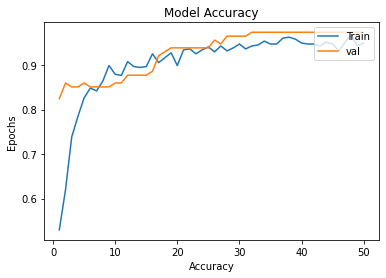

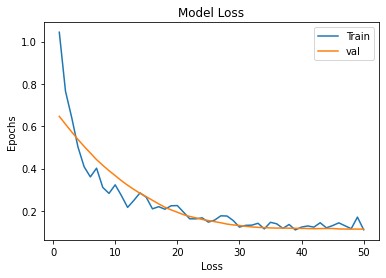

In [55]:
plot_learningCurve(history, epochs)

In [ ]:
# INFERENCE-: Validation accuracy is always greater than training accuracy means our model isn't overfitting
# until our validation loss is lower above than training model we can train our model